Forest boundaries were manually digitized from Google Earth satellite imagery using distance measurement paths, due to unavailability of official shapefiles.

In [1]:
from fastkml import kml
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import os


In [3]:
# File KML dan nama hutan
gpff_file = "gpff-map.kml"
name = "GPPF"

In [9]:
with open(gpff_file, 'rb') as f:   # <-- Baca sebagai bytes
    doc_bytes = f.read()

In [10]:
k = kml.KML()
k.from_string(doc_bytes)          # <-- Bisa langsung pakai bytes

fastkml.kml.KML(ns='{http://www.opengis.net/kml/2.2}', name_spaces={'kml': '{http://www.opengis.net/kml/2.2}', 'atom': '{http://www.w3.org/2005/Atom}', 'gx': '{http://www.google.com/kml/ext/2.2}'}, features=[fastkml.containers.Document(ns='{http://www.opengis.net/kml/2.2}', name_spaces={'kml': '{http://www.opengis.net/kml/2.2}', 'atom': '{http://www.w3.org/2005/Atom}', 'gx': '{http://www.google.com/kml/ext/2.2}'}, id='1GDbLZh59eRmyMzdZPza8cF9Bt73KQVlY', target_id='', name='Untitled map', visibility=None, isopen=None, atom_link=None, atom_author=None, address=None, phone_number=None, snippet=None, description=None, view=None, times=None, style_url=None, styles=[fastkml.styles.StyleMap(ns='{http://www.opengis.net/kml/2.2}', name_spaces={'kml': '{http://www.opengis.net/kml/2.2}', 'atom': '{http://www.w3.org/2005/Atom}', 'gx': '{http://www.google.com/kml/ext/2.2}'}, id='__managed_style_006D5E65643A5CE86F6F', target_id='', pairs=[fastkml.styles.Pair(ns='{http://www.opengis.net/kml/2.2}', na

In [12]:
list(k.features)

[]

In [13]:
gdf = gpd.read_file("gpff-map.kml", driver="KML")
print(gdf.head())


                     id              Name description timestamp begin end  \
0  09F09082F13A5CE86F5F  Untitled polygon        None       NaT   NaT NaT   

  altitudeMode  tessellate  extrude  visibility  drawOrder  icon  \
0         None          -1        0          -1        NaN  None   

                                            geometry  
0  POLYGON Z ((108.9723 1.17453 0, 108.97172 1.17...  


In [14]:
# Ambil geometry dari GeoDataFrame
poly3d = gdf.geometry[0]

In [15]:
# Buat polygon 2D
coords_2d = [(x, y) for x, y, *rest in poly3d.exterior.coords]
poly2d = Polygon(coords_2d)

In [16]:
gdf2d = gpd.GeoDataFrame({"Nama": ["GPPF"], "geometry": [poly2d]}, crs="EPSG:4326")

In [17]:
# Simpan shapefile
gdf2d.to_file("GPPF.shp")
print("Shapefile GPPF berhasil dibuat!")

Shapefile GPPF berhasil dibuat!


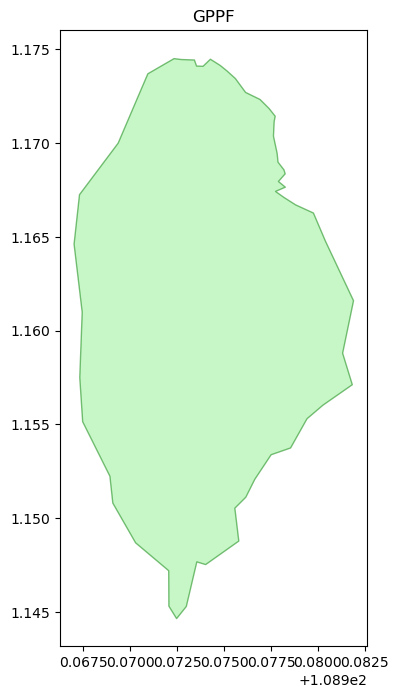

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
gdf2d.plot(ax=ax, edgecolor='green', facecolor='lightgreen', alpha=0.5)
ax.set_title("GPPF")
ax.set_aspect('equal')
plt.show()

In [21]:
gpff_new = "gpff_new.kml"
name = "gpff_new"

with open(gpff_new, 'rb') as f:
    doc_bytes = f.read()

k = kml.KML()
k.from_string(doc_bytes)


fastkml.kml.KML(ns='{http://www.opengis.net/kml/2.2}', name_spaces={'kml': '{http://www.opengis.net/kml/2.2}', 'atom': '{http://www.w3.org/2005/Atom}', 'gx': '{http://www.google.com/kml/ext/2.2}'}, features=[fastkml.containers.Document(ns='{http://www.opengis.net/kml/2.2}', name_spaces={'kml': '{http://www.opengis.net/kml/2.2}', 'atom': '{http://www.w3.org/2005/Atom}', 'gx': '{http://www.google.com/kml/ext/2.2}'}, id='1GDbLZh59eRmyMzdZPza8cF9Bt73KQVlY', target_id='', name='gpff', visibility=None, isopen=None, atom_link=None, atom_author=None, address=None, phone_number=None, snippet=None, description=None, view=None, times=None, style_url=None, styles=[fastkml.styles.StyleMap(ns='{http://www.opengis.net/kml/2.2}', name_spaces={'kml': '{http://www.opengis.net/kml/2.2}', 'atom': '{http://www.w3.org/2005/Atom}', 'gx': '{http://www.google.com/kml/ext/2.2}'}, id='__managed_style_006D5E65643A5CE86F6F', target_id='', pairs=[fastkml.styles.Pair(ns='{http://www.opengis.net/kml/2.2}', name_space

In [22]:
gpff2 = gpd.read_file(gpff_new, driver="KML")
print(gpff2.head())

                     id  Name description timestamp begin end altitudeMode  \
0  09F09082F13A5CE86F5F  gpff        None       NaT   NaT NaT         None   

   tessellate  extrude  visibility  drawOrder  icon  \
0          -1        0          -1        NaN  None   

                                            geometry  
0  POLYGON Z ((108.9723 1.17453 0, 108.97172 1.17...  


In [23]:
# Ambil geometry dari GeoDataFrame
poly3d = gpff2.geometry[0]

In [24]:
# Buat polygon 2D
coords_2d = [(x, y) for x, y, *rest in poly3d.exterior.coords]
poly2d = Polygon(coords_2d)

In [25]:
gpff2d = gpd.GeoDataFrame({"Nama": ["gpff_new"], "geometry": [poly2d]}, crs="EPSG:4326")

In [27]:
# buat folder baru
folder_name = "gpff_new"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [28]:
shp_path = os.path.join(folder_name, "gpff_new.shp")
gpff2d.to_file(shp_path)
print(f"Shapefile GPPF berhasil dibuat di folder '{folder_name}'!")

Shapefile GPPF berhasil dibuat di folder 'gpff_new'!


In [39]:
# fig, ax = plt.subplots(figsize=(10,10), dpi=300)  # dpi 300 = resolusi tinggi
# gpff2d.plot(ax=ax, edgecolor='darkgreen', facecolor='#a8e6a3', alpha=0.5)
# # ax.set_title("GPPF", fontsize=14)
# # ax.set_aspect('equal')
# # plt.show()

In [30]:
fig.savefig(os.path.join(folder_name, "gpff_plot.png"), dpi=300)

## GSPF

In [33]:
gspf_file = "gspf/GSPF.kml"
name = "GSPF"

# BACA FILE SEBAGAI BYTES
with open(gspf_file, 'rb') as f:
    doc_bytes = f.read()

In [34]:
k = kml.KML()
k.from_string(doc_bytes)

fastkml.kml.KML(ns='{http://www.opengis.net/kml/2.2}', name_spaces={'kml': '{http://www.opengis.net/kml/2.2}', 'atom': '{http://www.w3.org/2005/Atom}', 'gx': '{http://www.google.com/kml/ext/2.2}'}, features=[fastkml.containers.Document(ns='{http://www.opengis.net/kml/2.2}', name_spaces={'kml': '{http://www.opengis.net/kml/2.2}', 'atom': '{http://www.w3.org/2005/Atom}', 'gx': '{http://www.google.com/kml/ext/2.2}'}, id='1vWUJ-qsfQrwN2SxdJ_OU0m1EdTLsWRSA', target_id='', name='GSPF', visibility=None, isopen=None, atom_link=None, atom_author=None, address=None, phone_number=None, snippet=None, description=None, view=None, times=None, style_url=None, styles=[fastkml.styles.StyleMap(ns='{http://www.opengis.net/kml/2.2}', name_spaces={'kml': '{http://www.opengis.net/kml/2.2}', 'atom': '{http://www.w3.org/2005/Atom}', 'gx': '{http://www.google.com/kml/ext/2.2}'}, id='__managed_style_0F7DD05F0D3A5DDA78D6', target_id='', pairs=[fastkml.styles.Pair(ns='{http://www.opengis.net/kml/2.2}', name_space

In [35]:
gspf = gpd.read_file(gspf_file, driver="KML")
print(gspf.head())

                     id          Name description timestamp begin end  \
0  05274A1EC23A5D9A6F10  GUNUNG MAJAU        None       NaT   NaT NaT   

  altitudeMode  tessellate  extrude  visibility  drawOrder  icon  \
0         None          -1        0          -1        NaN  None   

                                            geometry  
0  POLYGON Z ((109.25374 1.18379 0, 109.25469 1.1...  


In [40]:
# Ambil geometry dari GeoDataFrame
poly3d = gspf.geometry[0]

In [41]:
# Buat polygon 2D
coords_2d = [(x, y) for x, y, *rest in poly3d.exterior.coords]
poly2d = Polygon(coords_2d)

In [44]:
gspf = gpd.GeoDataFrame({"Nama": ["gspf"], "geometry": [poly2d]}, crs="EPSG:4326")

In [48]:
folder_name = 'gspf'
shp_path = os.path.join(folder_name, "gspf.shp")
gspf.to_file(shp_path)
print(f"Shapefile GPPF berhasil dibuat di folder '{gspf}'!")

Shapefile GPPF berhasil dibuat di folder '   Nama                                           geometry
0  gspf  POLYGON ((109.25374 1.18379, 109.25469 1.18052...'!


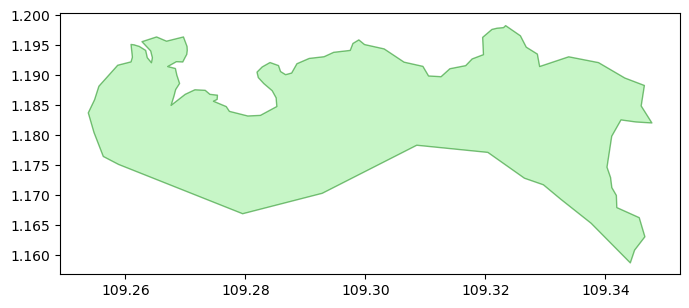

In [49]:
fig, ax = plt.subplots(figsize=(8,8))
gspf.plot(ax=ax, edgecolor='green', facecolor='lightgreen', alpha=0.5)
# ax.set_title("GPPF")
ax.set_aspect('equal')
plt.show()

In [51]:
fig.savefig(os.path.join(folder_name, "gspf.png"), dpi=300)

## GMPF

In [52]:
# load file
gmpf_file = "gmpf/gmpf.kml"  
name = "gmpf"

# BACA FILE SEBAGAI BYTES
with open(gmpf_file, 'rb') as f:
    doc_bytes = f.read()

In [53]:
k = kml.KML()
k.from_string(doc_bytes)

fastkml.kml.KML(ns='{http://www.opengis.net/kml/2.2}', name_spaces={'kml': '{http://www.opengis.net/kml/2.2}', 'atom': '{http://www.w3.org/2005/Atom}', 'gx': '{http://www.google.com/kml/ext/2.2}'}, features=[fastkml.containers.Document(ns='{http://www.opengis.net/kml/2.2}', name_spaces={'kml': '{http://www.opengis.net/kml/2.2}', 'atom': '{http://www.w3.org/2005/Atom}', 'gx': '{http://www.google.com/kml/ext/2.2}'}, id='18sGv7-b377MeTYYD-ERNTNXKB9XpLQ4D', target_id='', name='GMPF-NEW', visibility=None, isopen=None, atom_link=None, atom_author=None, address=None, phone_number=None, snippet=None, description=None, view=None, times=None, style_url=None, styles=[fastkml.styles.StyleMap(ns='{http://www.opengis.net/kml/2.2}', name_spaces={'kml': '{http://www.opengis.net/kml/2.2}', 'atom': '{http://www.w3.org/2005/Atom}', 'gx': '{http://www.google.com/kml/ext/2.2}'}, id='__managed_style_2FD7F49E023A5DFDBA10', target_id='', pairs=[fastkml.styles.Pair(ns='{http://www.opengis.net/kml/2.2}', name_s

In [54]:
gmpf = gpd.read_file(gmpf_file, driver="KML")
print(gmpf.head())

                     id  Name description timestamp begin end altitudeMode  \
0  0498E0CA213A5D8FD836  GMPF        None       NaT   NaT NaT         None   

   tessellate  extrude  visibility  drawOrder  icon  \
0          -1        0          -1        NaN  None   

                                            geometry  
0  POLYGON Z ((109.23676 1.22445 0, 109.2359 1.22...  


In [57]:
# ambil geometry dari geoDataFrame
poly3d = gmpf.geometry[0]

In [58]:
# buat polygon 2d
# Buat polygon 2D
coords_2d = [(x, y) for x, y, *rest in poly3d.exterior.coords]
poly2d = Polygon(coords_2d)

In [59]:
gmpf = gpd.GeoDataFrame({"Nama": ["gmpf"], "geometry": [poly2d]}, crs="EPSG:4326")

In [61]:
folder_name = 'gmpf'
shp_path = os.path.join(folder_name, "gmpf.shp")
gspf.to_file(shp_path)
print(f"Shapefile GPPF berhasil dibuat di folder '{folder_name}'!")

Shapefile GPPF berhasil dibuat di folder 'gmpf'!


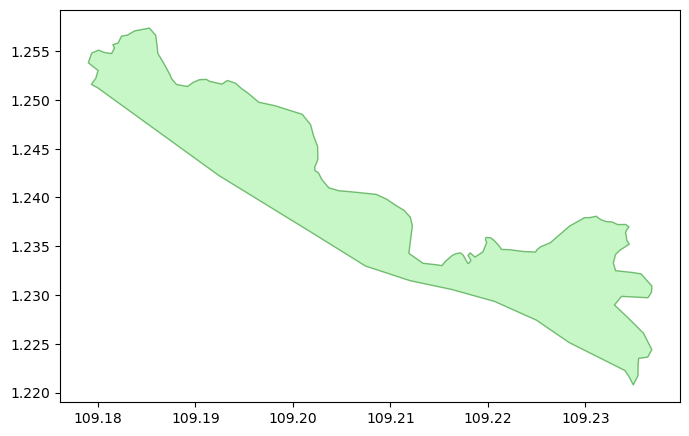

In [62]:
fig, ax = plt.subplots(figsize=(8,8))
gmpf.plot(ax=ax, edgecolor='green', facecolor='lightgreen', alpha=0.5)
# ax.set_title("GPPF")
ax.set_aspect('equal')
plt.show()